<a href="https://colab.research.google.com/github/FreeRikato/Deep-learning-lab/blob/main/Deep-learning-lab/CNN/Rock_Paper_Scissor_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Get the path of the dataset from google drive
import os
from keras.preprocessing.image import ImageDataGenerator

file_path = '/content/drive/MyDrive/Rock Paper Scissor Dataset'
#Path of dataset  = '/content/drive/MyDrive/Rock Paper Scissor Dataset'
train_dir = os.path.join(file_path,'train')
#Path of training dataset = '/content/drive/MyDrive/Rock Paper Scissor Dataset/train'
test_dir = os.path.join(file_path,'test')
validation_dir = os.path.join(file_path,'test')

In [3]:
datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.1, 
                                   height_shift_range=0.1, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
# What is ImageDataGenerator?
# Image data generator is like a magic box that can create many different versions of a picture. 
# You can give it one picture, and it will make many new pictures that are slightly different, but still similar.
# For example, if you have a picture of a cat, the image data generator can make new pictures of the cat that are 
# a little bit brighter or darker, or a little bit zoomed in or out. This is called "data augmentation", and 
# it can help make your machine learning model better at recognizing cats in different situations.
# You can tell the image data generator what kinds of changes to make to the pictures by setting different options, 
# like how much to rotate or zoom the image, or how much to shift the picture left or right. 
# Once you've set these options, you can use the image data generator 
# to create lots of new pictures that you can use to train your machine learning model.

batch_size = 32
img_size = (224,224)

training_generator = datagen.flow_from_directory(
    train_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical'
)

testing_generator = datagen.flow_from_directory(
    test_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical'
)

validation_generator = datagen.flow_from_directory(
    test_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 2040 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (224,224,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [5]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(training_generator,
          steps_per_epoch = len(training_generator),
          epochs = 10,
          validation_data = validation_generator,
          validation_steps = len(validation_generator))

test_loss, test_acc = model.evaluate(testing_generator, steps=len(testing_generator))
print('Test accuracy:', test_acc)

Epoch 1/10
64/64 [==============================] - 61s 759ms/step - loss: 1.2501 - accuracy: 0.5436 - val_loss: 0.9549 - val_accuracy: 0.5941
Epoch 2/10
64/64 [==============================] - 49s 766ms/step - loss: 0.4705 - accuracy: 0.8230 - val_loss: 0.4314 - val_accuracy: 0.8226
Epoch 3/10
64/64 [==============================] - 46s 717ms/step - loss: 0.3069 - accuracy: 0.8931 - val_loss: 0.6707 - val_accuracy: 0.7527
Epoch 4/10
64/64 [==============================] - 45s 712ms/step - loss: 0.2394 - accuracy: 0.9216 - val_loss: 0.5265 - val_accuracy: 0.8038
Epoch 5/10
64/64 [==============================] - 45s 704ms/step - loss: 0.2168 - accuracy: 0.9279 - val_loss: 0.4016 - val_accuracy: 0.8280
Epoch 6/10
64/64 [==============================] - 46s 720ms/step - loss: 0.1473 - accuracy: 0.9588 - val_loss: 0.5428 - val_accuracy: 0.7661
Epoch 7/10
64/64 [==============================] - 50s 775ms/step - loss: 0.1201 - accuracy: 0.9583 - val_loss: 0.3304 - val_accuracy: 0.8737

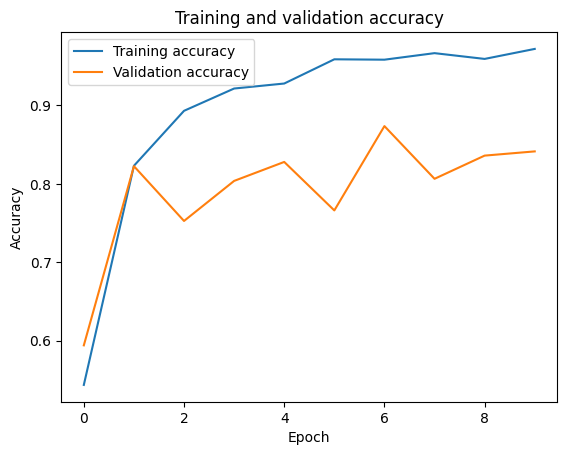

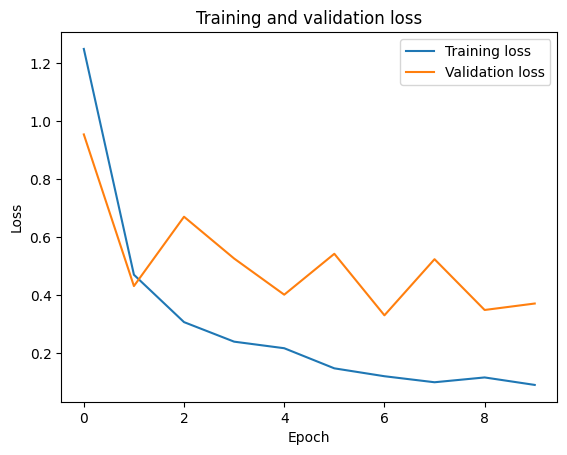

In [6]:
import matplotlib.pyplot as plt

# Get the training and validation accuracy from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the training and validation loss from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation accuracy
plt.plot(acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

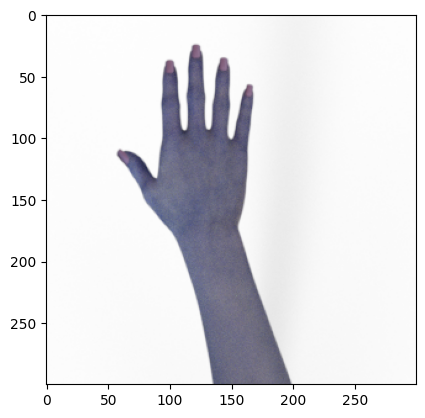

In [7]:
import cv2

test_img = cv2.imread('/content/drive/MyDrive/Rock Paper Scissor Dataset/prediction/paper4.png')
plt.imshow(test_img)

In [8]:
test_img = cv2.resize(test_img, (224,224))
test_input = test_img.reshape(1,224,224,3)
result = model.predict(test_input)
result

1/1 [==============================] - 0s 240ms/step


array([[0., 0., 1.]], dtype=float32)

In [10]:
if result[0][0] == 1:
  print('Rock')
elif result[0][2] == 1:
  print('Paper')
else:
  print('Scissor')


Paper
